In [2]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from utils.face_analyzer import FaceAnalyzer
import cv2


base_address = os.path.join('datasets', 'smiling_or_not')
smiling_address = os.path.join(base_address, 'smile')
non_smiling_address = os.path.join(base_address, 'no_smile')

allowed_extensions = ('.jpg', '.jpeg')
smiling_images_addresses = [ os.path.join(smiling_address, f) for f in os.listdir(smiling_address) if f.endswith(allowed_extensions)]
non_smiling_images_addresses = [os.path.join(non_smiling_address, f) for f in os.listdir(non_smiling_address) if f.endswith((allowed_extensions))]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from models.frame import Frame


def analyze(frames: list[Frame]):
    face_analyzer = FaceAnalyzer()
    results = []
    for frame in frames:
        image = frame.image
        image_corners = (0, 0, image.shape[1], image.shape[0])
        frame.smile = face_analyzer.get_smile(image, image_corners)
        if frame.smile:
            results.append(1)
        else:
            results.append(0)
    return results
frames = [Frame(index, address.split('/')[-1], cv2.imread(address)) for index, address in enumerate(smiling_images_addresses + non_smiling_images_addresses)]
predictions = analyze(frames)
ground_truth = [1] * len(smiling_images_addresses) + [0] * len(non_smiling_images_addresses)


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(ground_truth, predictions)
precision = precision_score(ground_truth, predictions)
recall = recall_score(ground_truth, predictions)
f1 = f1_score(ground_truth, predictions)

print(f"Accuracy: {accuracy * 100:.0f}%")
print(f"Precision: {precision * 100:.0f}%")
print(f"Recall: {recall * 100:.0f}%")
print(f"F1 Score: {f1 * 100:.0f}%")

Accuracy: 85%
Precision: 82%
Recall: 90%
F1 Score: 86%


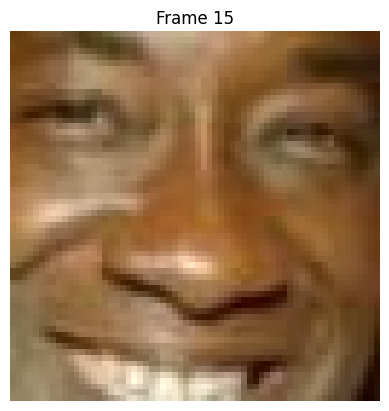

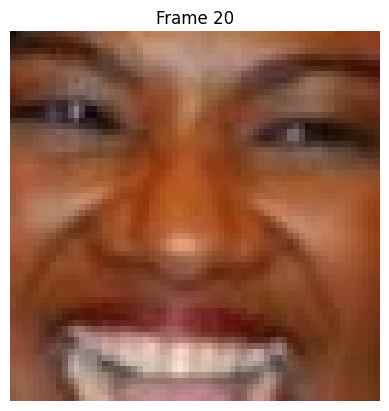

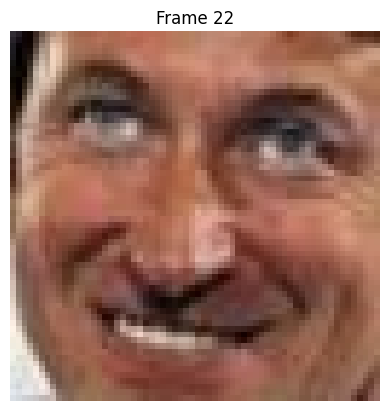

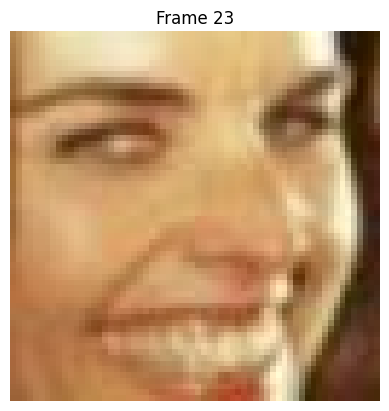

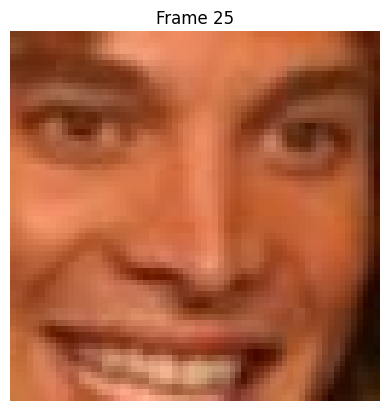

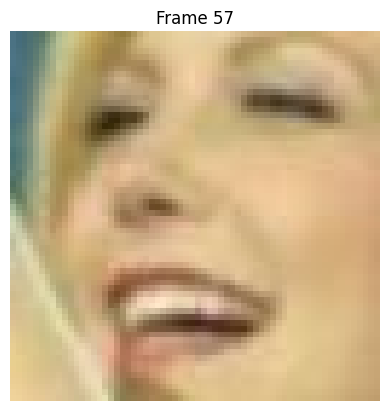

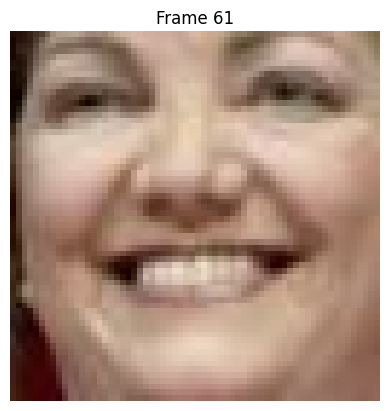

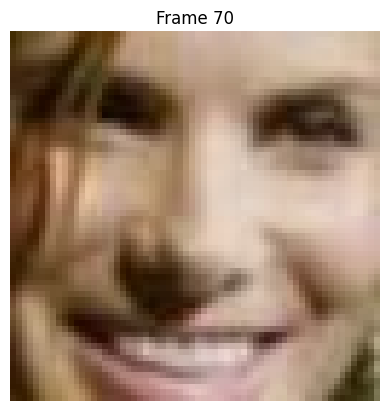

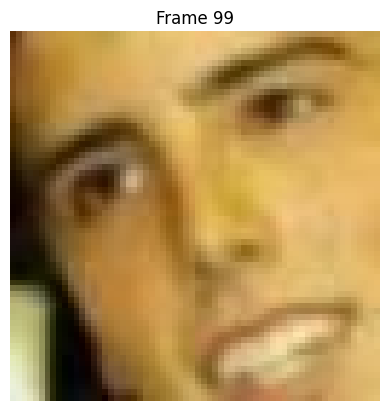

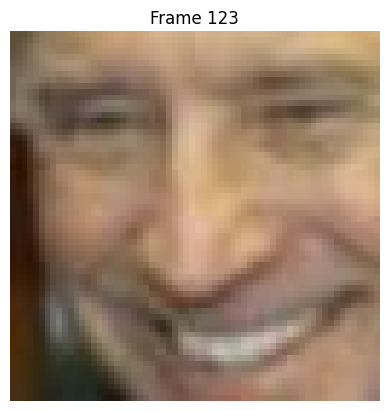

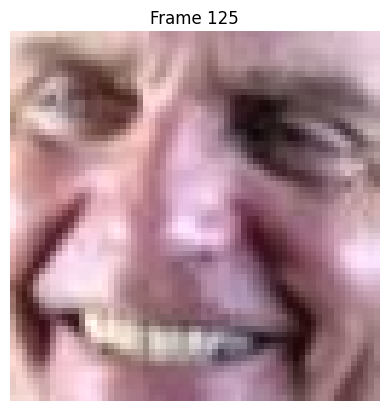

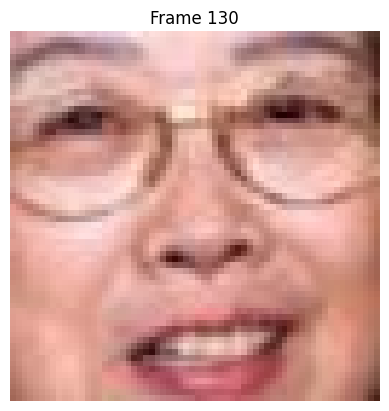

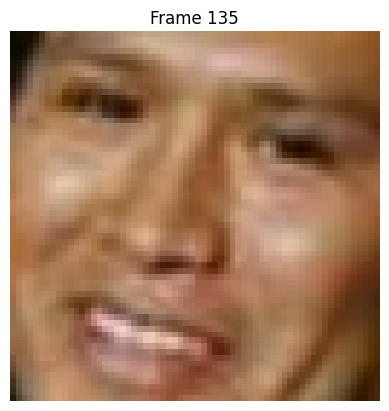

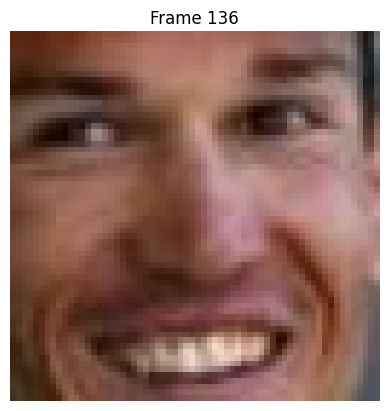

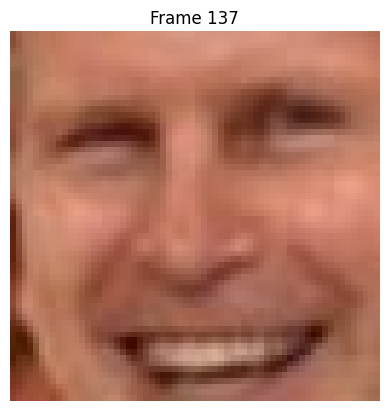

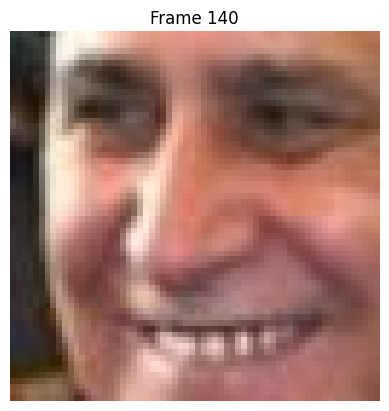

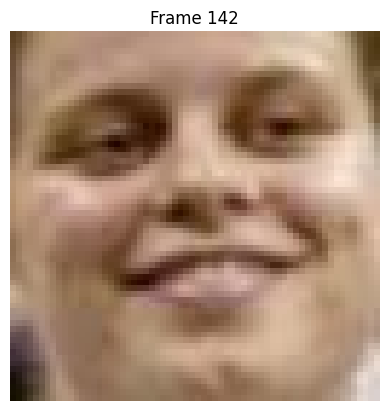

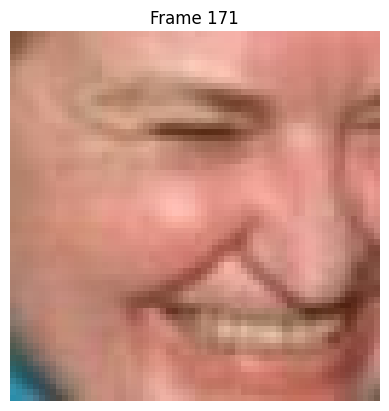

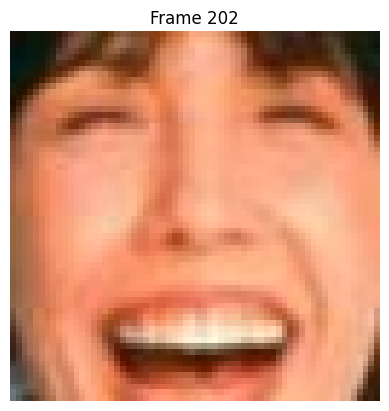

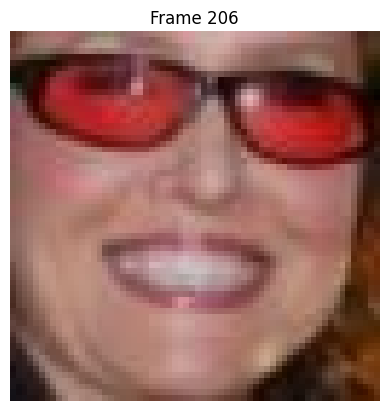

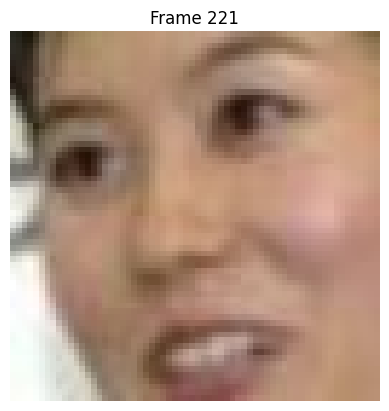

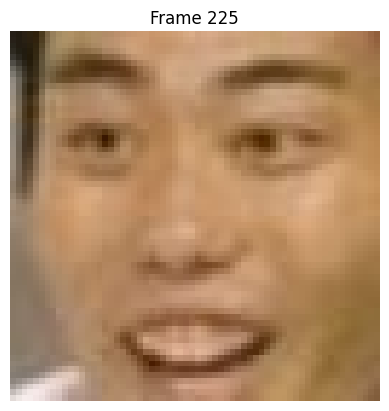

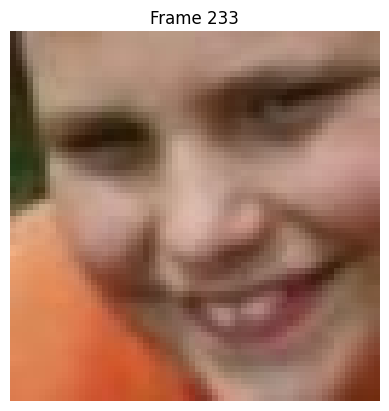

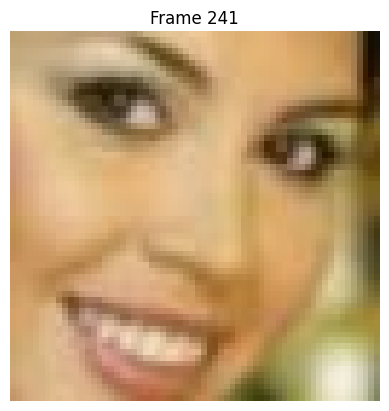

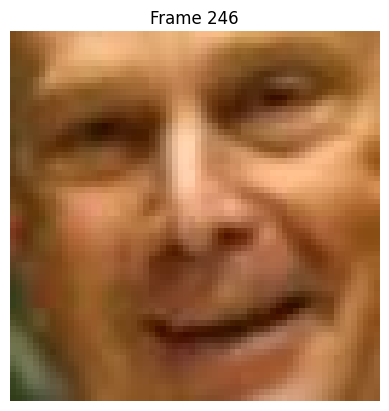

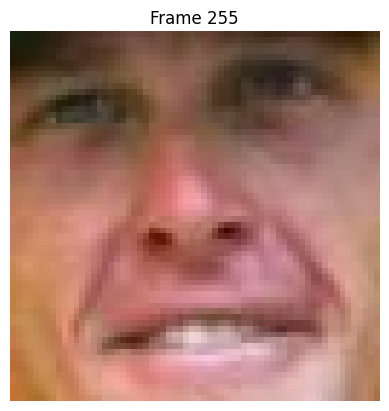

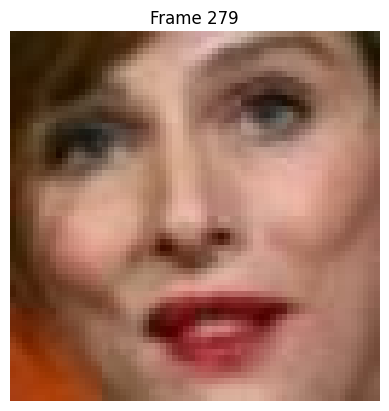

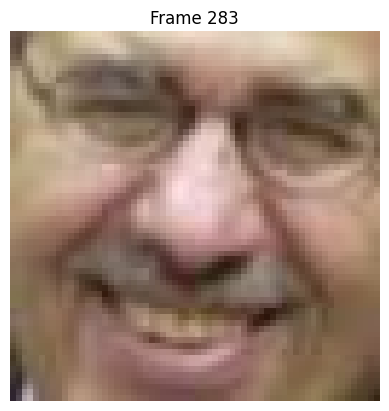

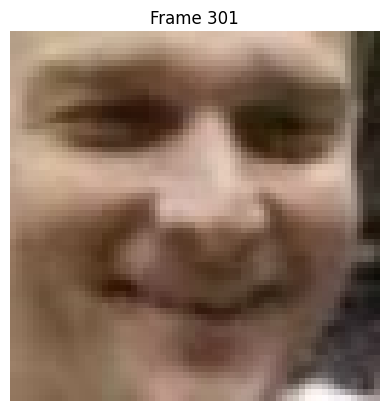

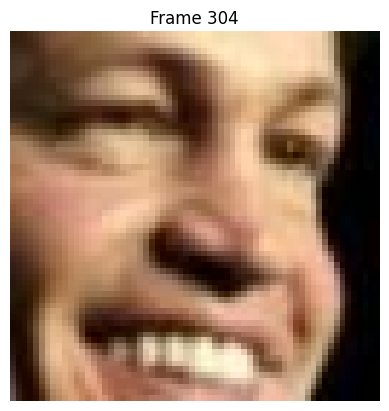

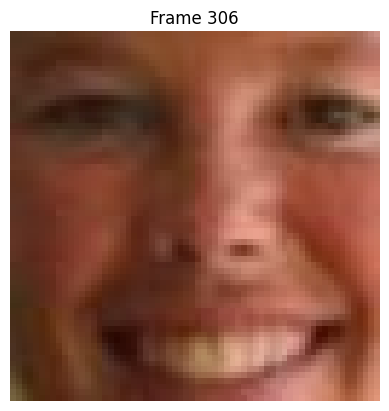

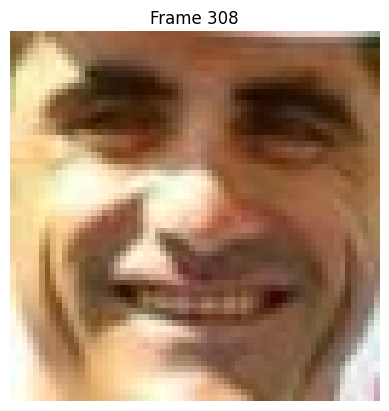

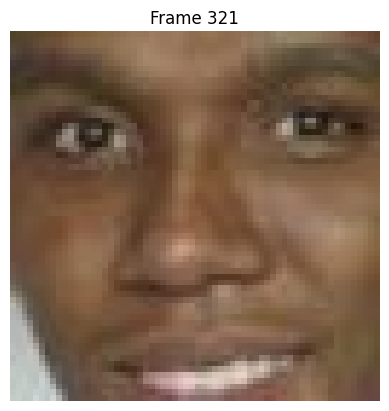

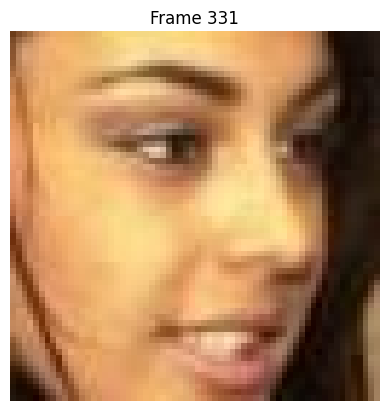

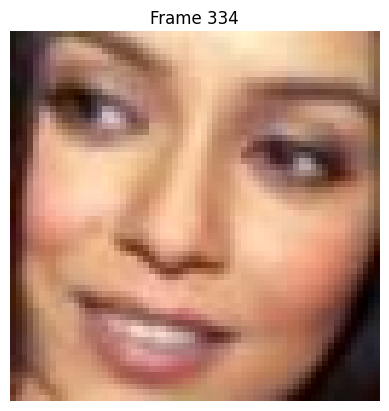

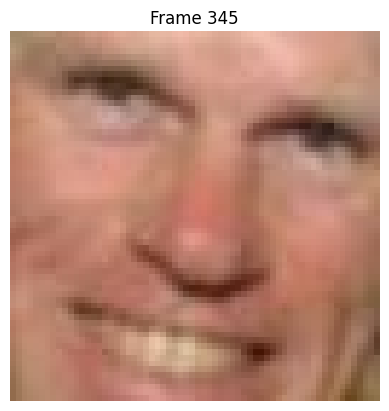

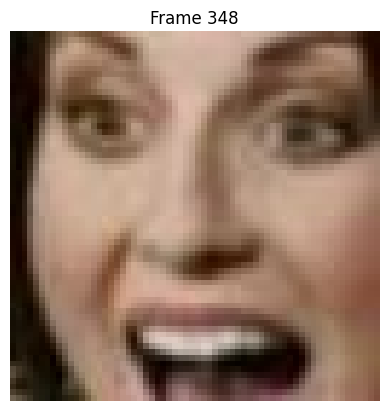

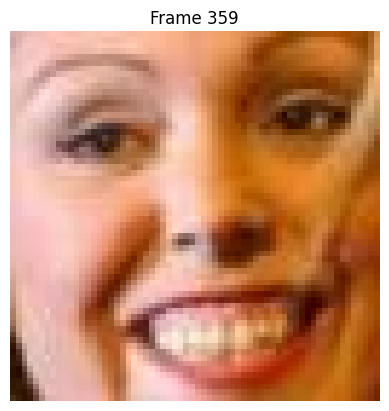

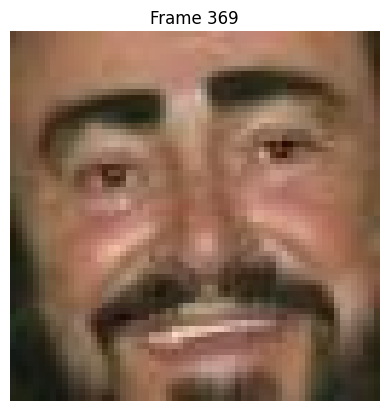

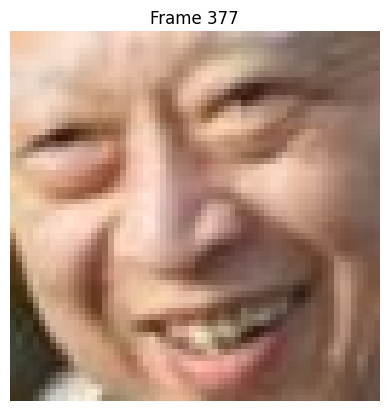

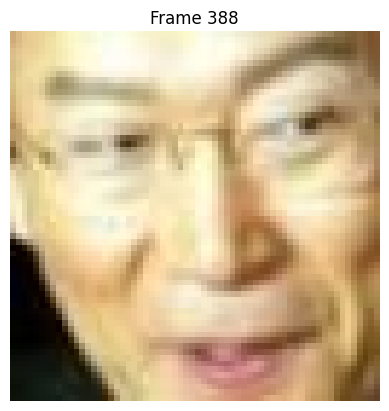

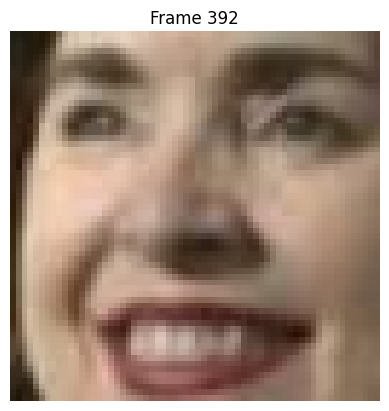

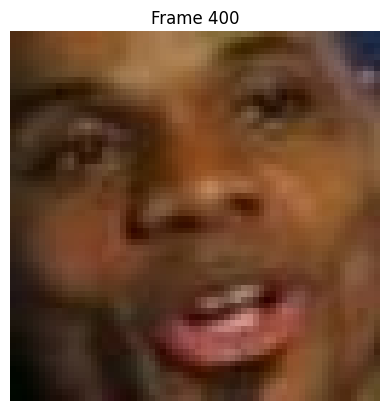

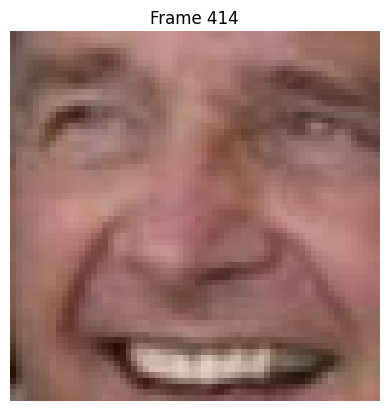

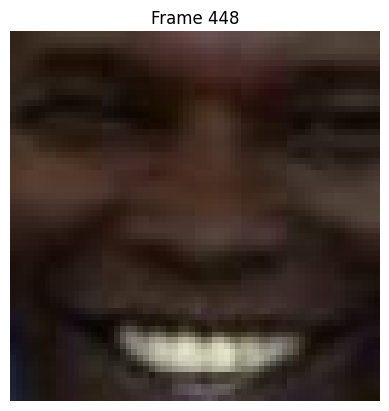

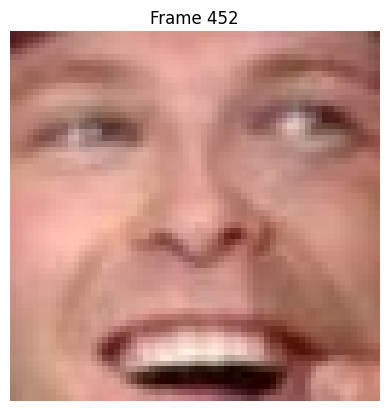

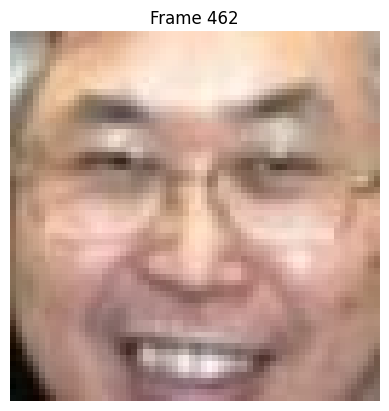

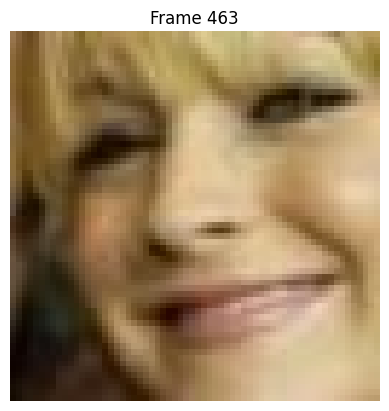

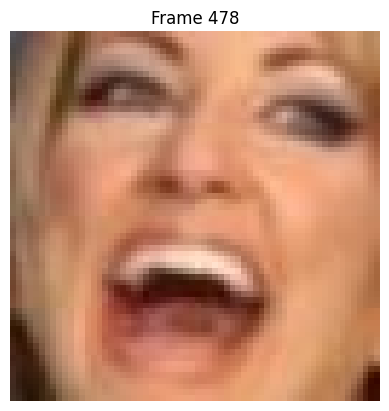

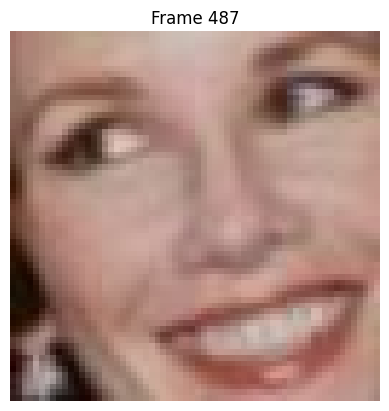

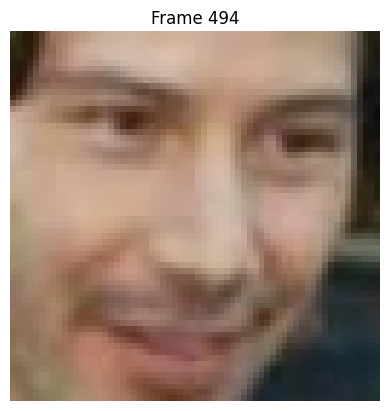

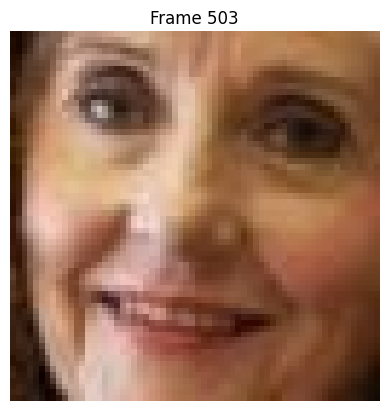

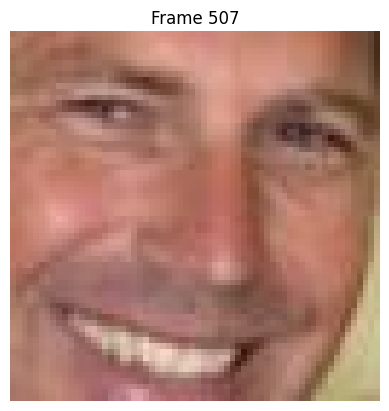

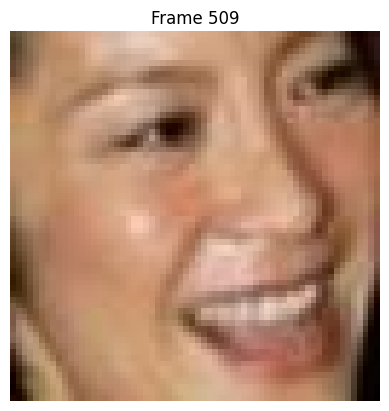

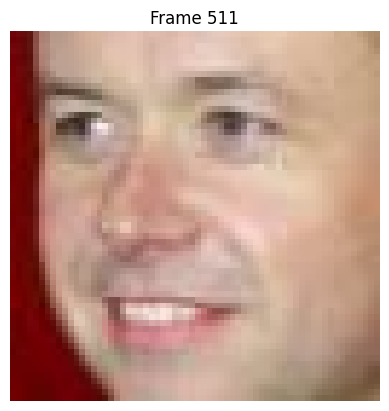

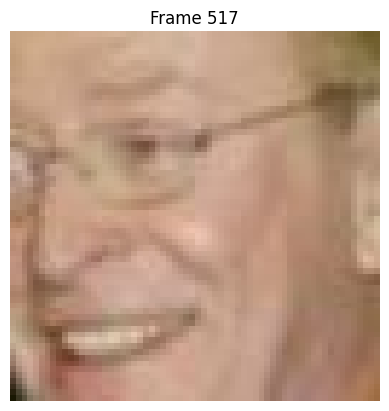

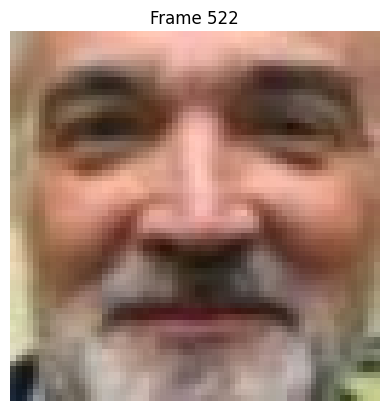

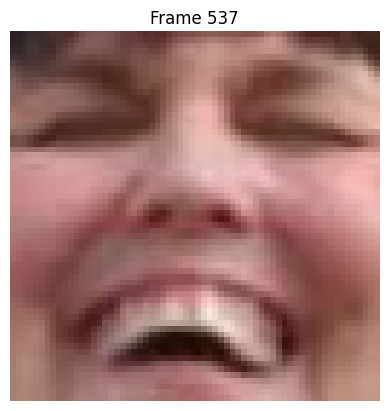

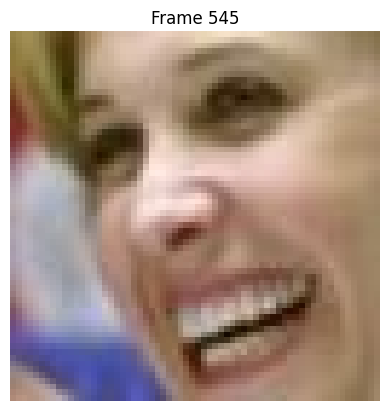

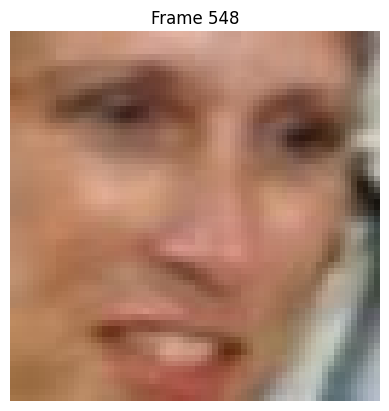

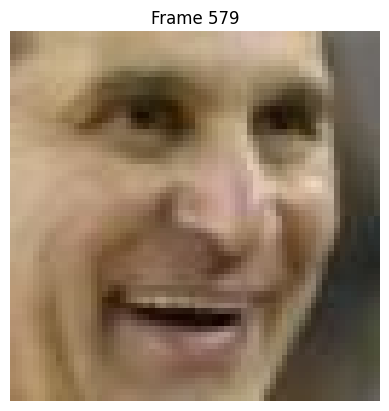

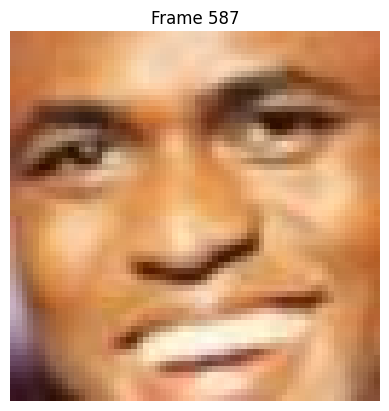

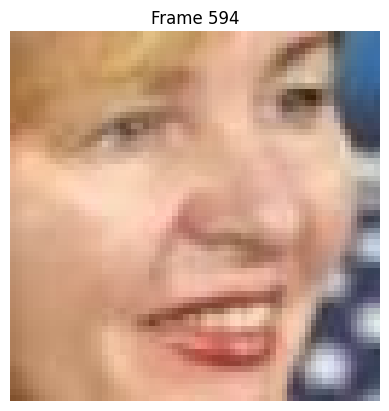

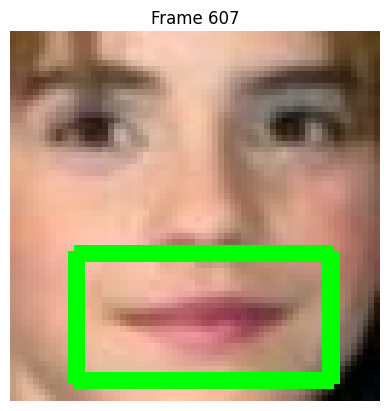

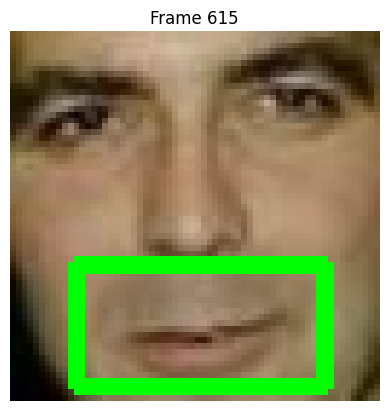

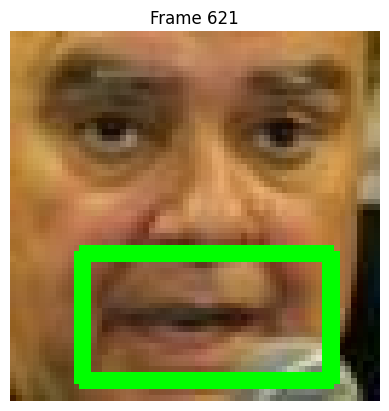

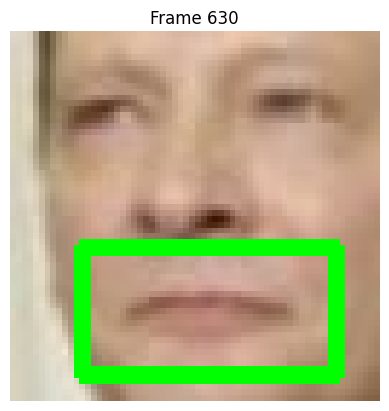

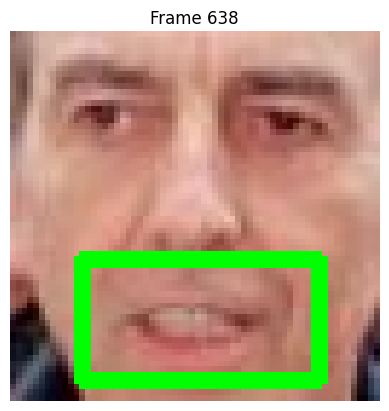

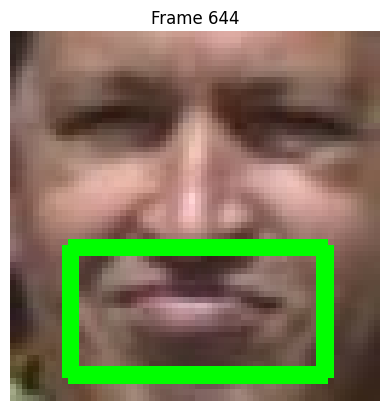

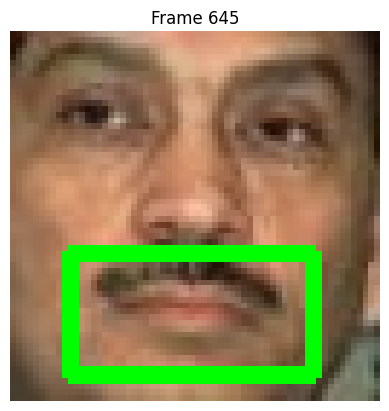

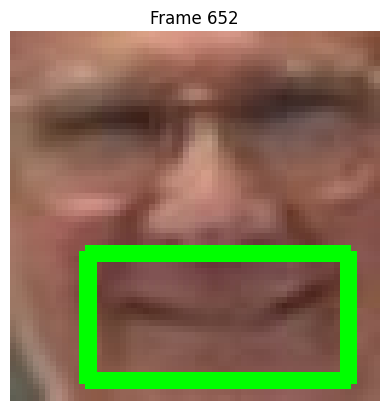

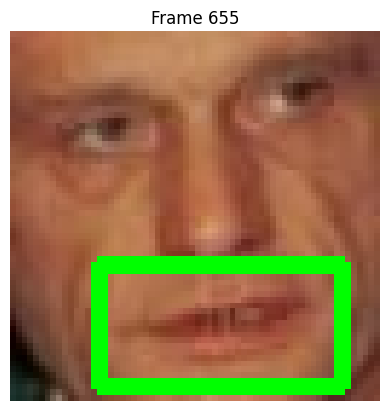

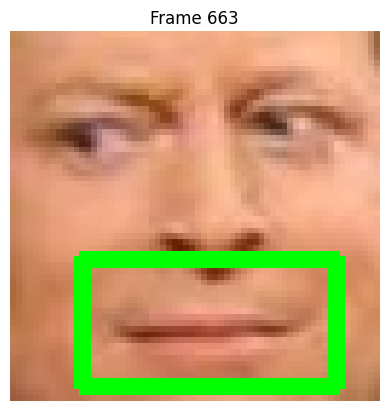

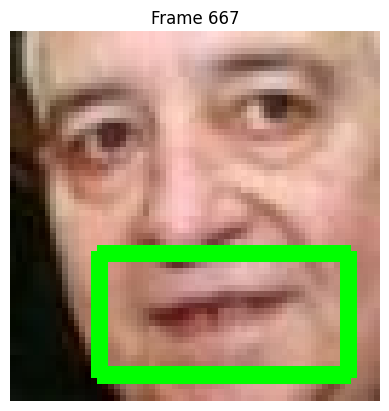

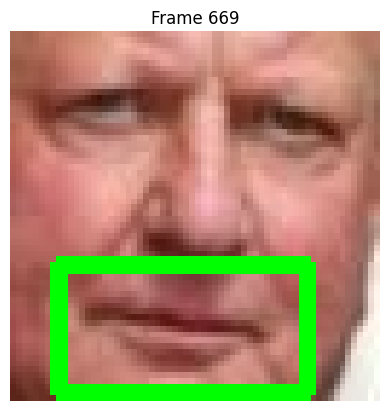

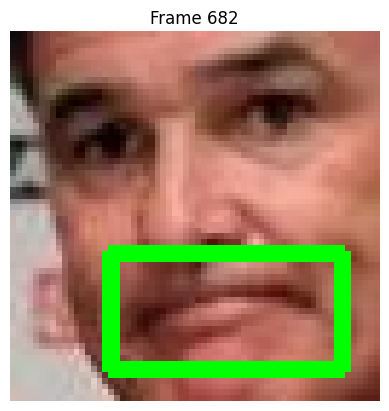

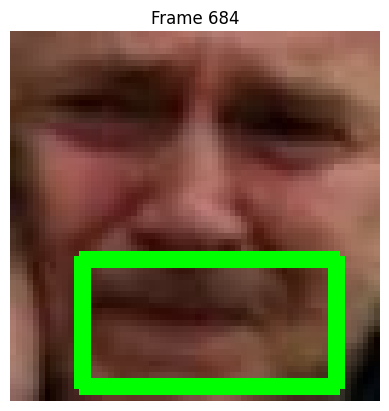

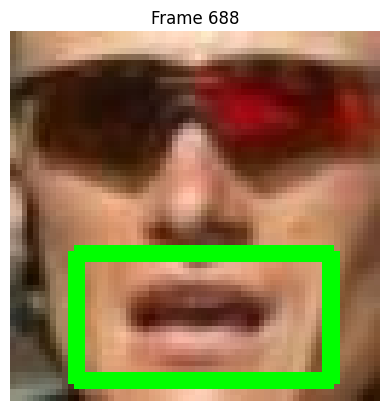

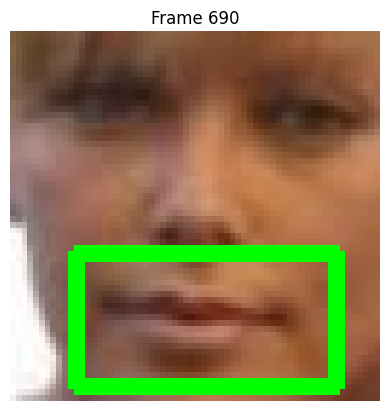

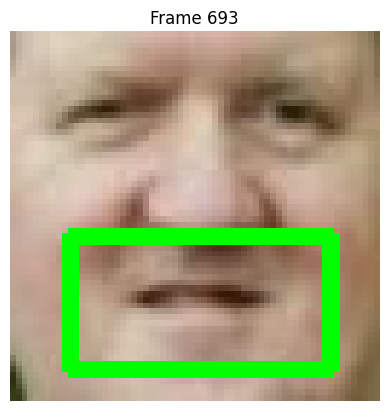

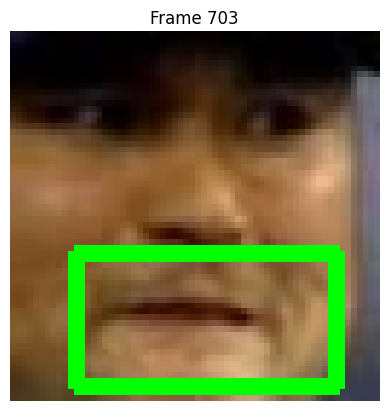

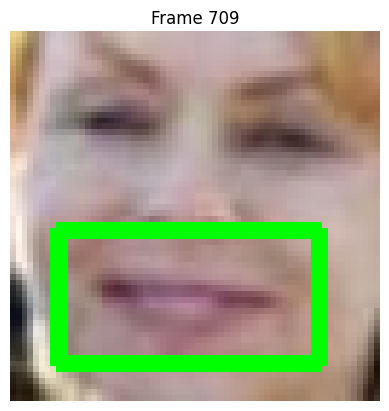

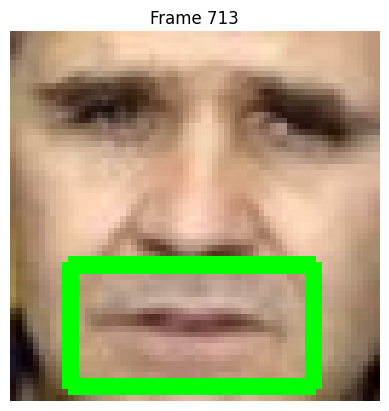

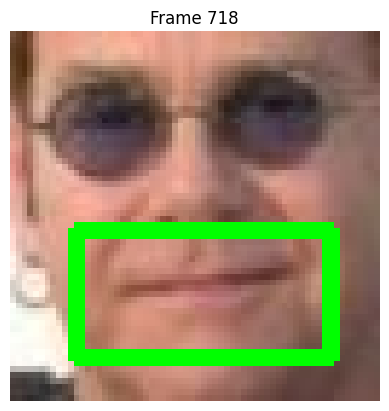

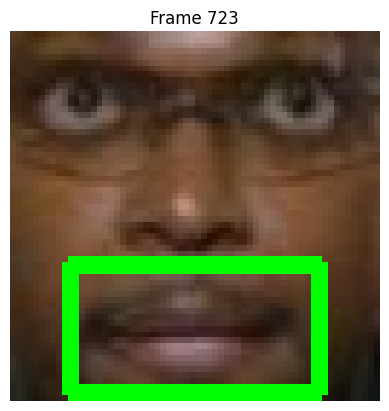

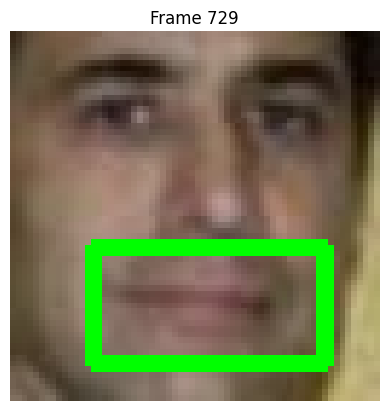

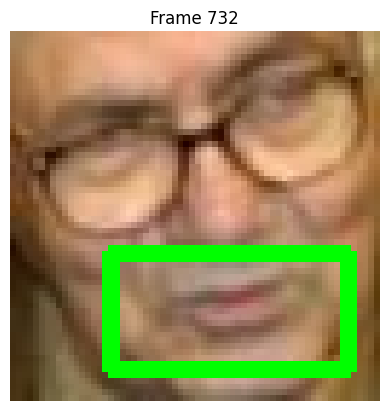

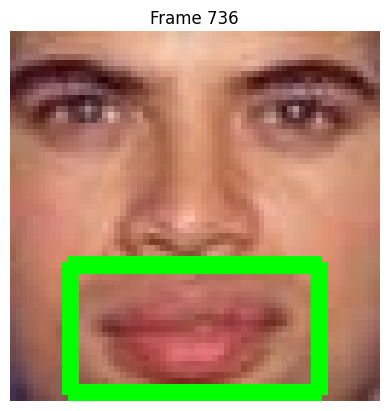

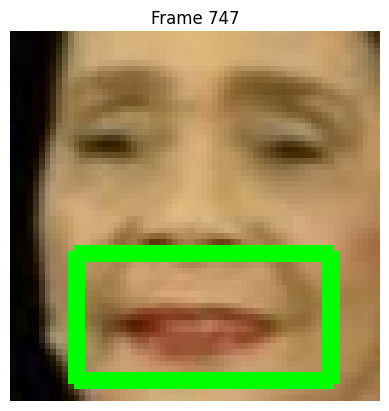

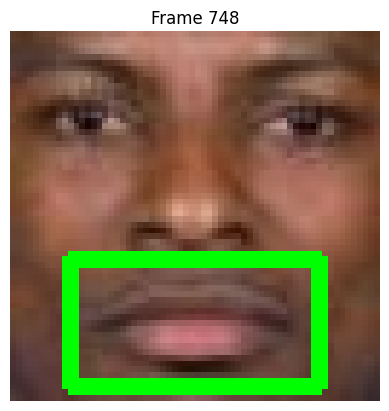

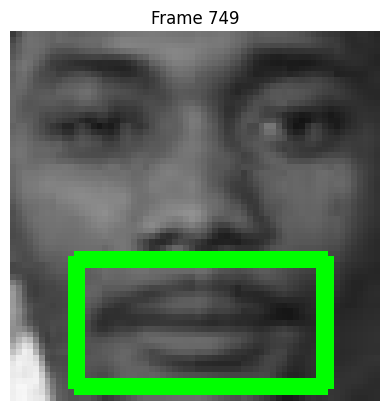

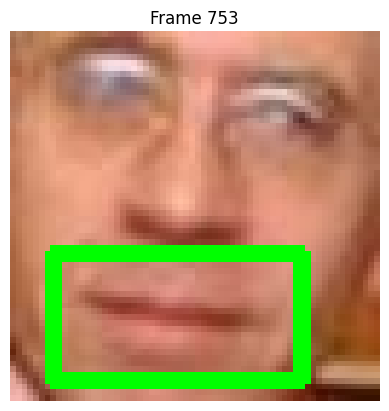

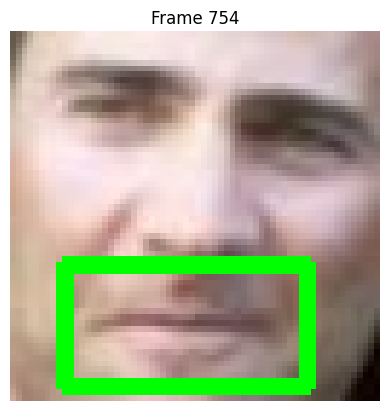

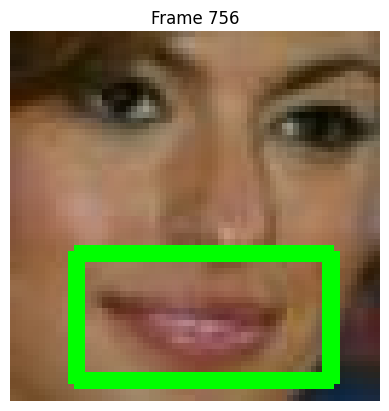

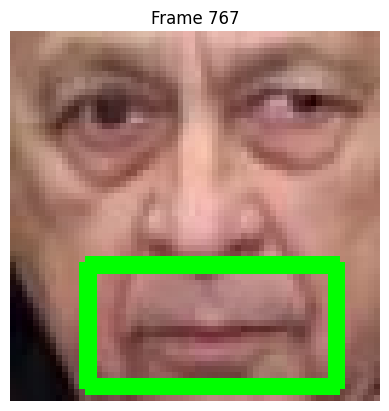

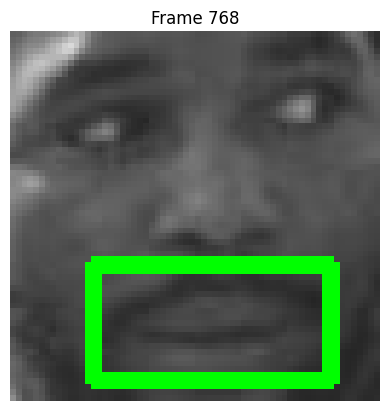

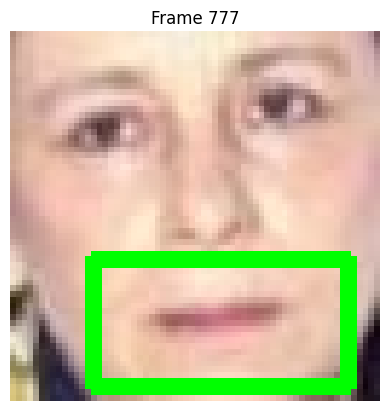

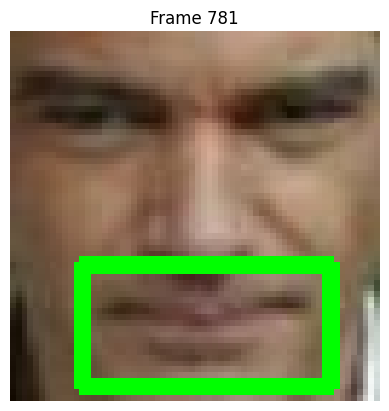

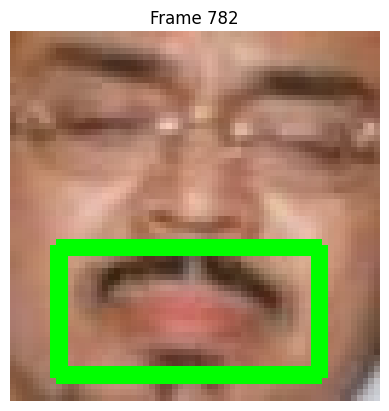

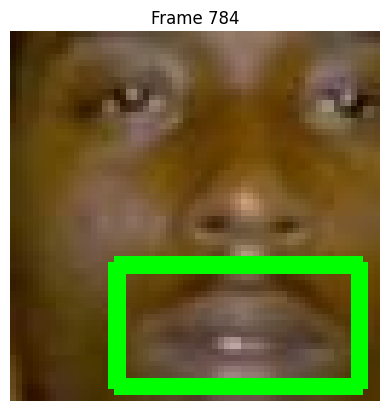

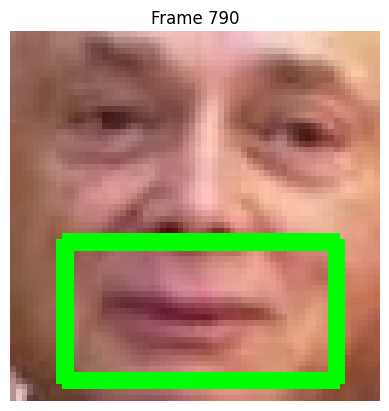

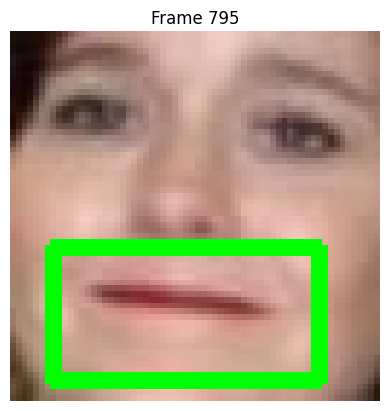

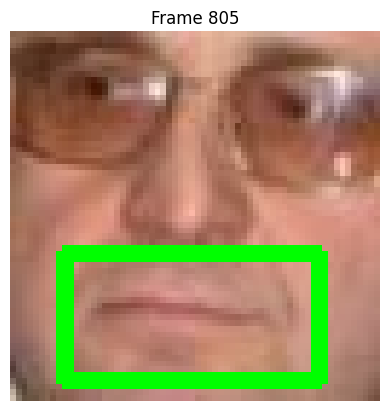

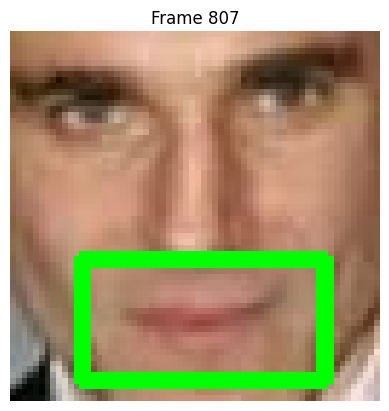

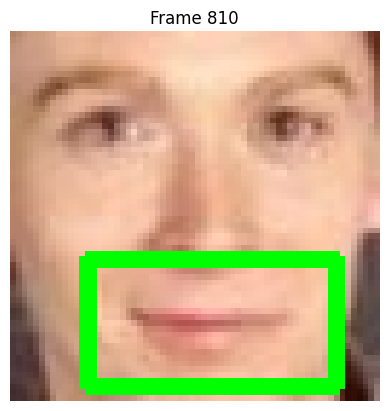

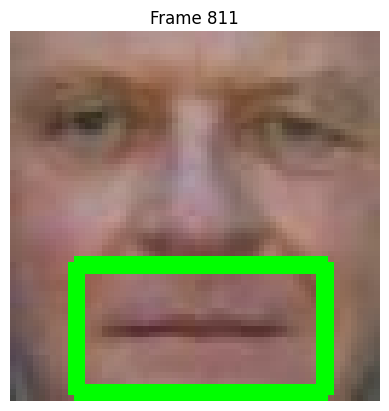

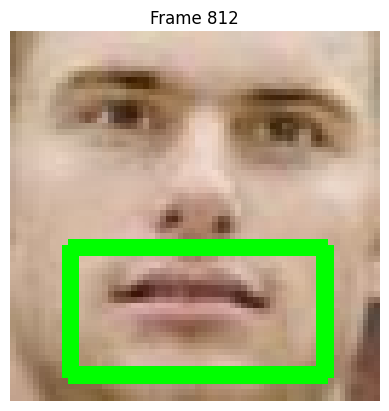

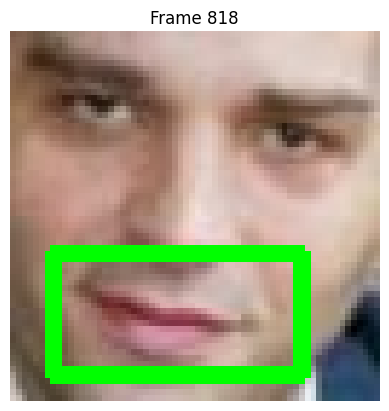

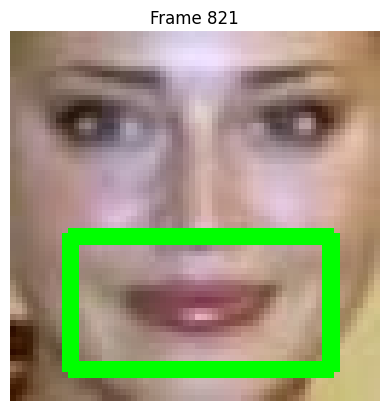

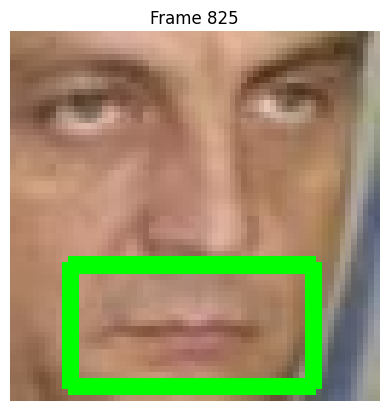

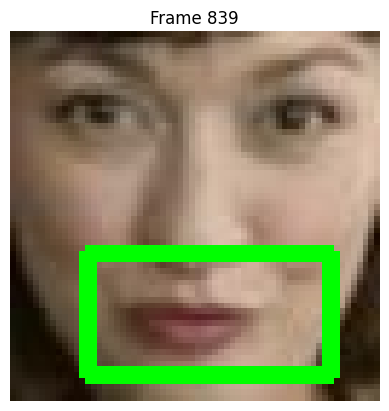

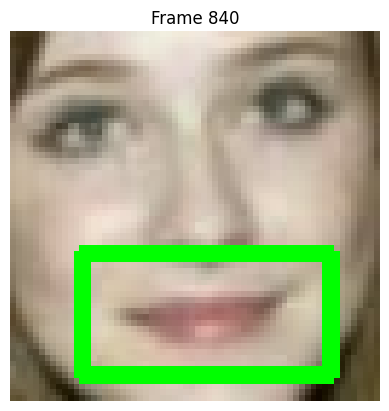

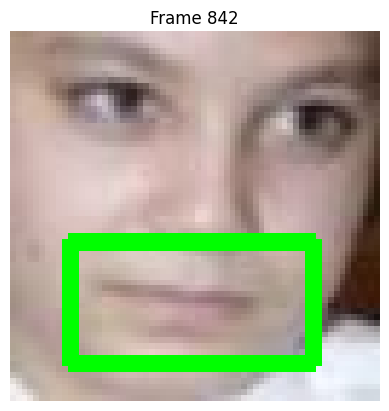

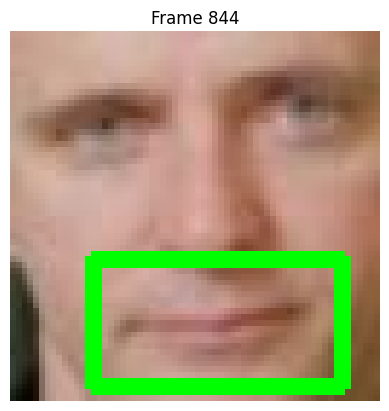

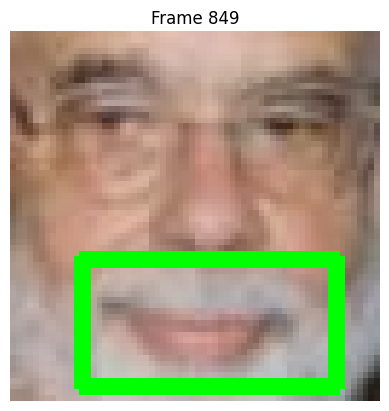

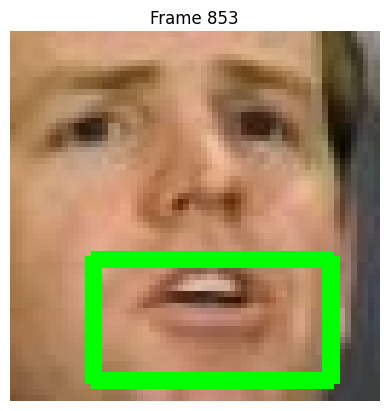

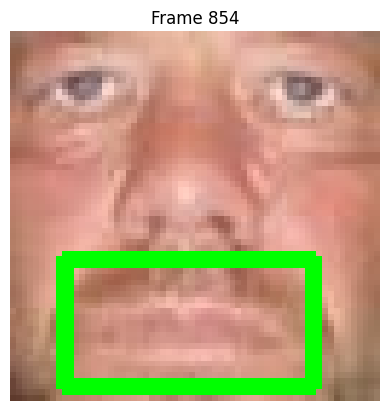

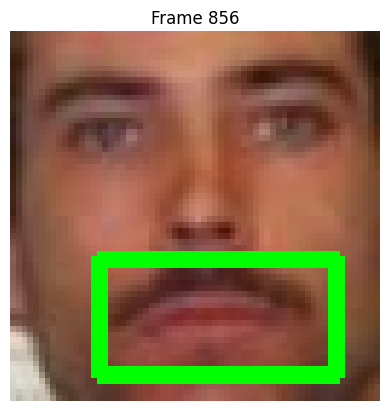

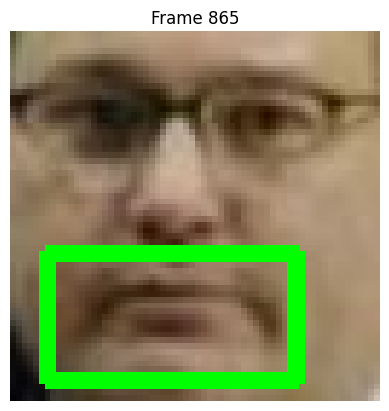

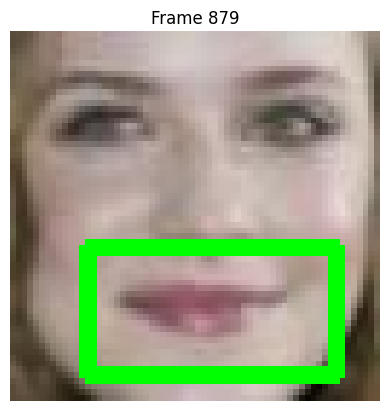

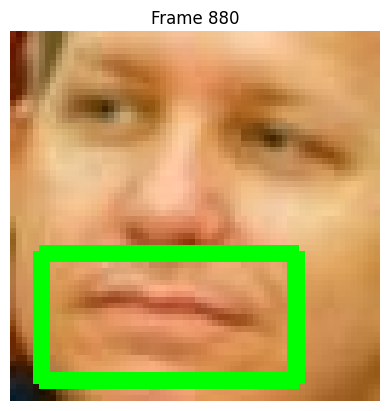

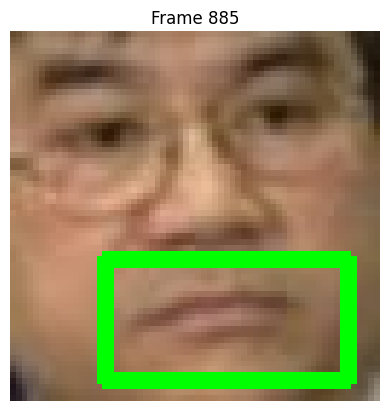

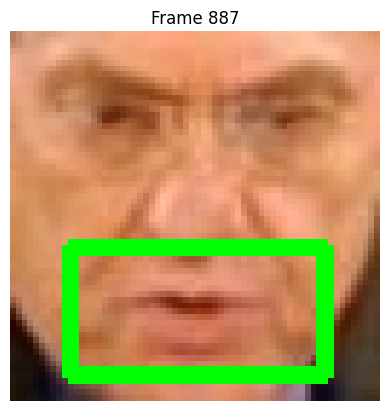

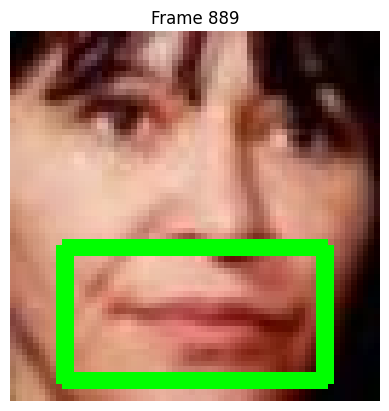

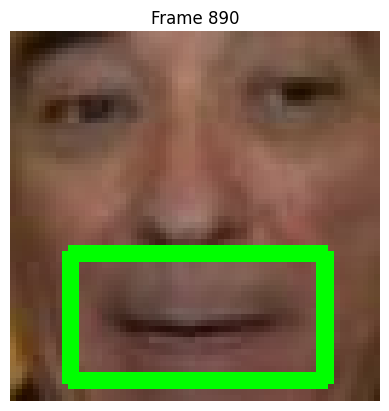

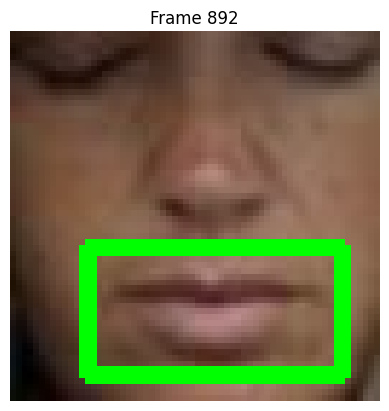

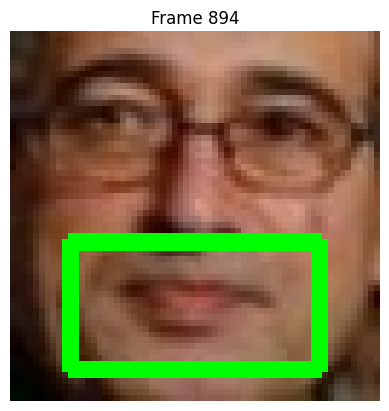

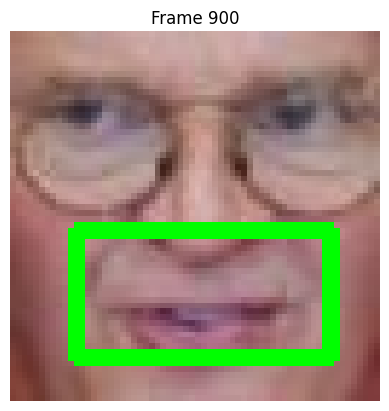

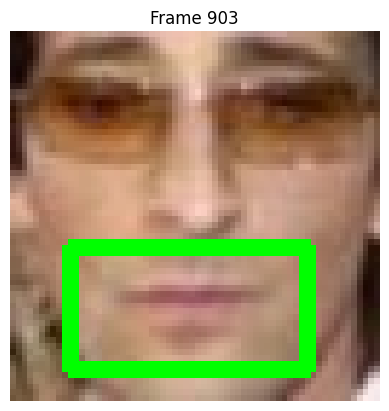

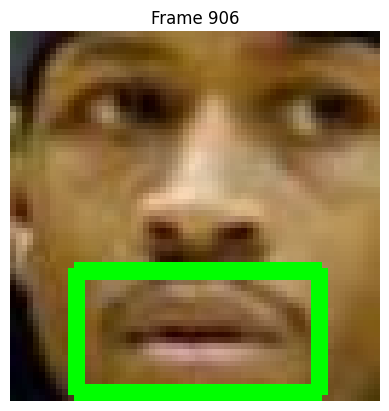

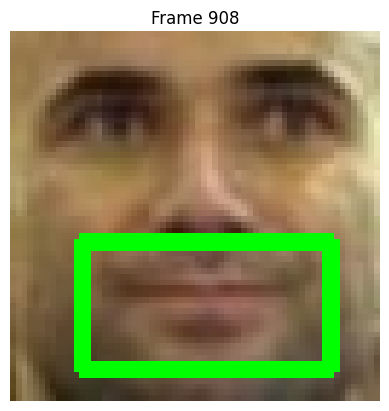

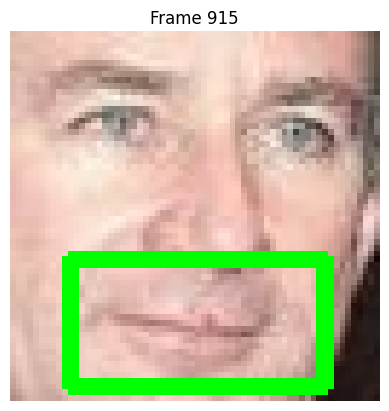

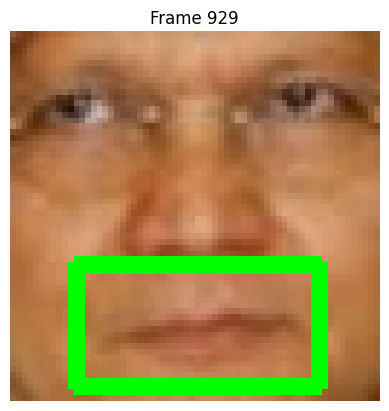

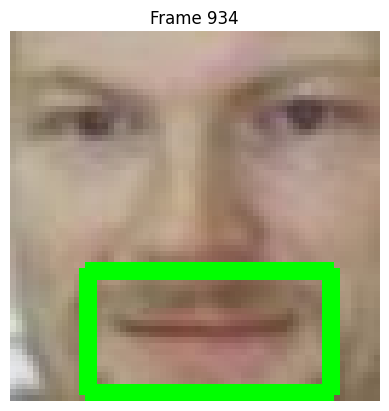

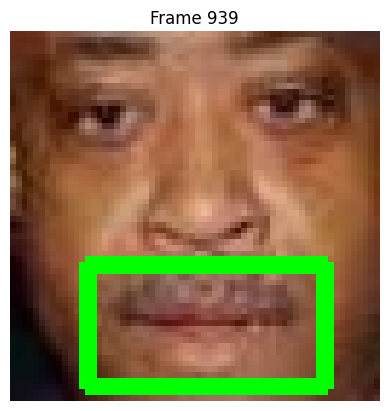

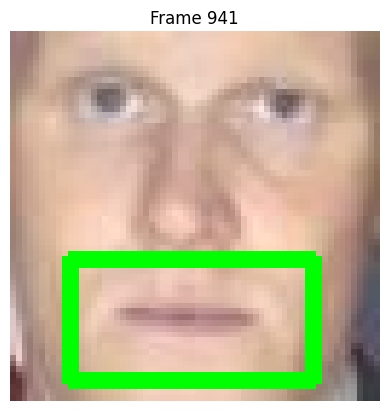

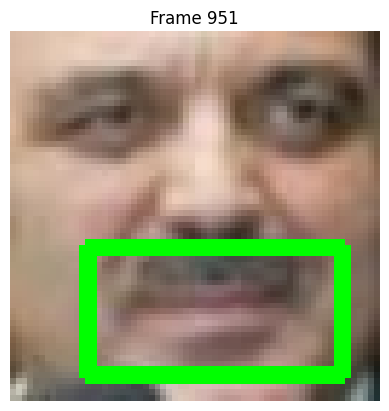

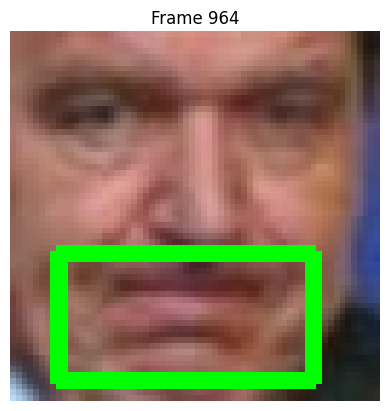

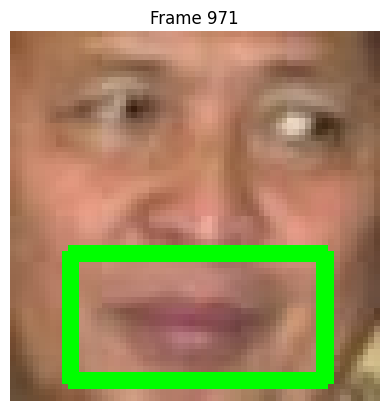

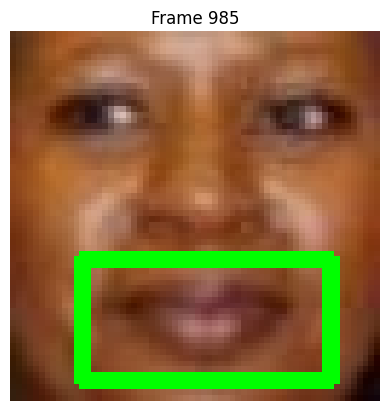

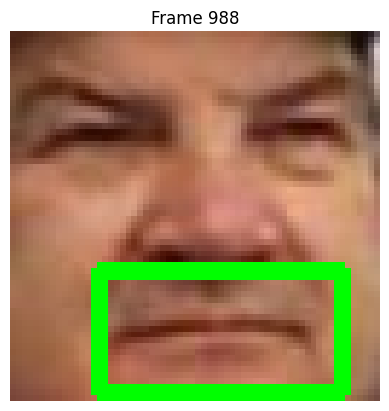

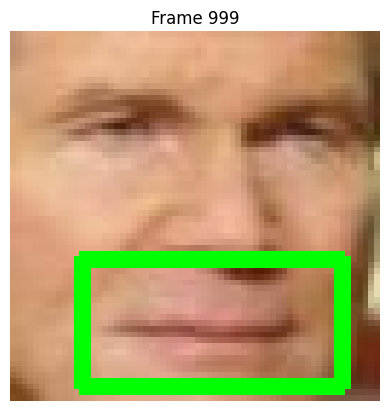

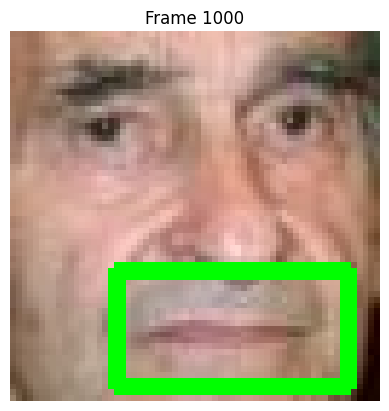

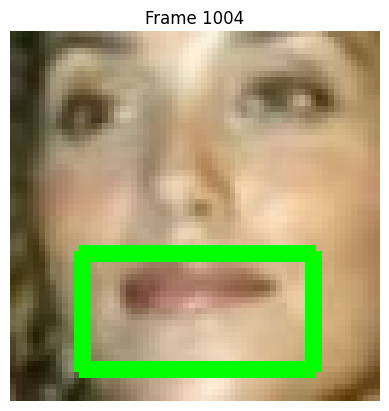

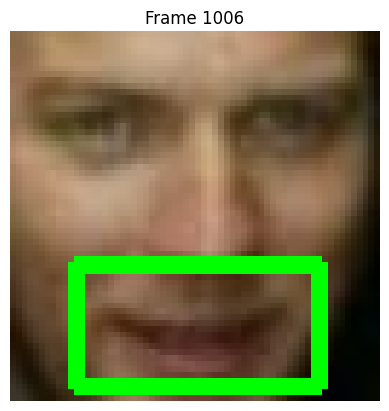

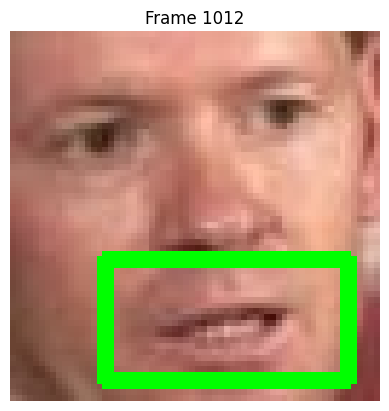

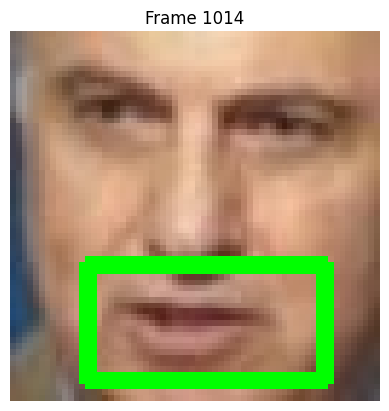

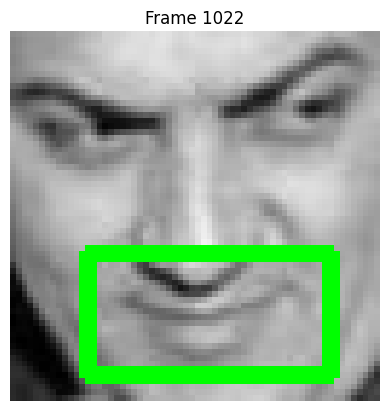

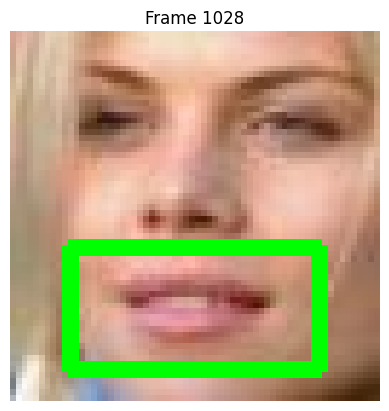

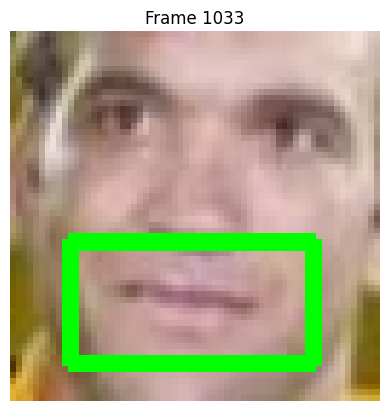

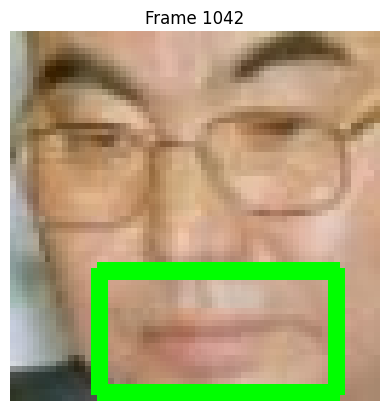

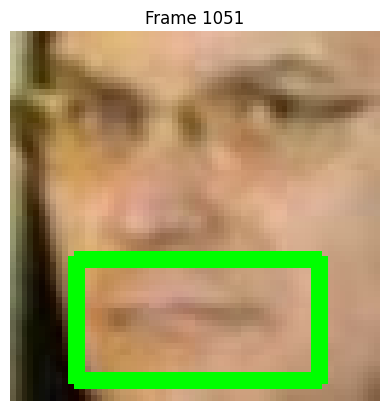

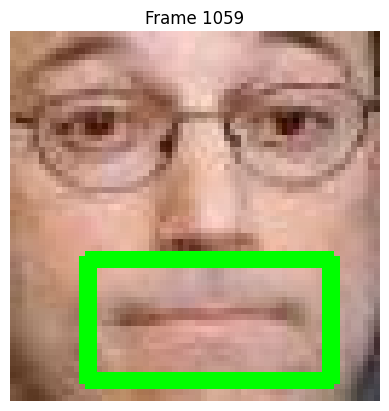

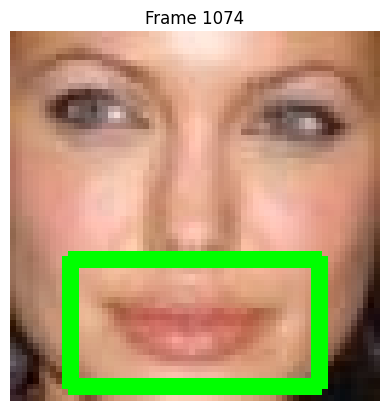

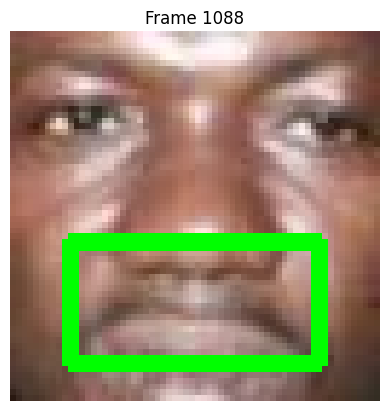

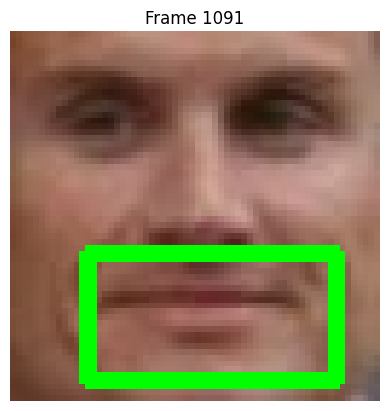

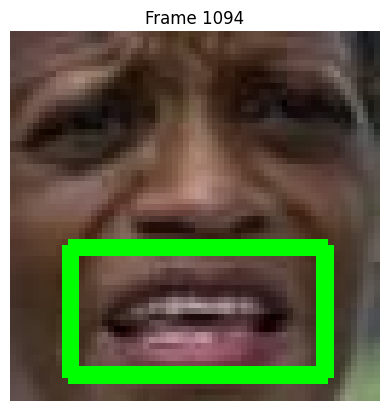

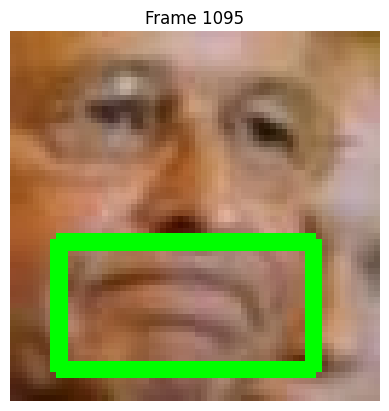

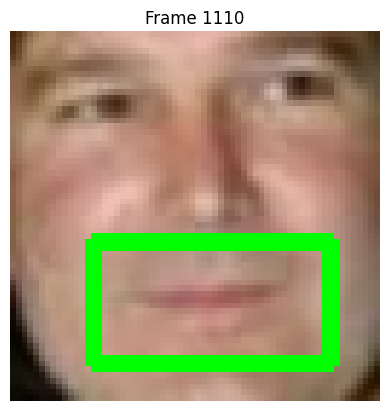

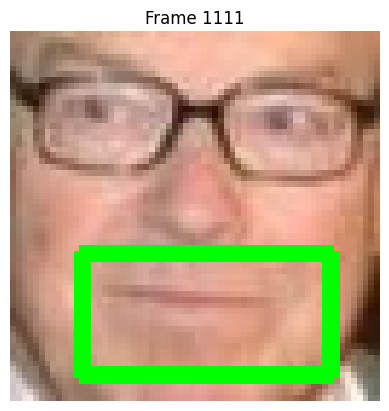

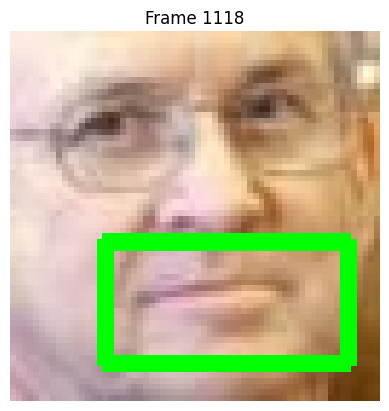

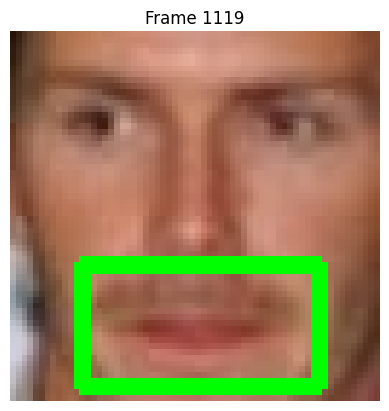

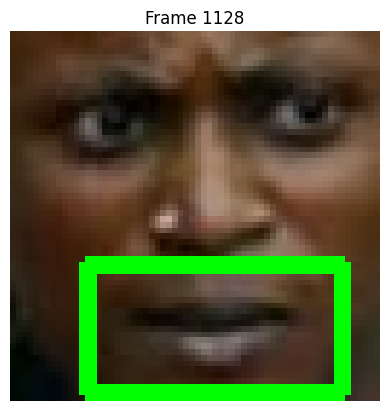

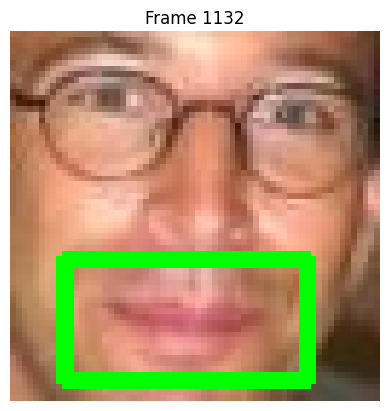

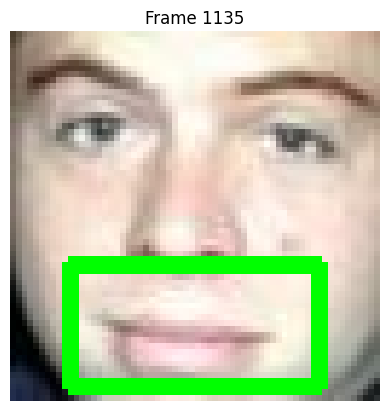

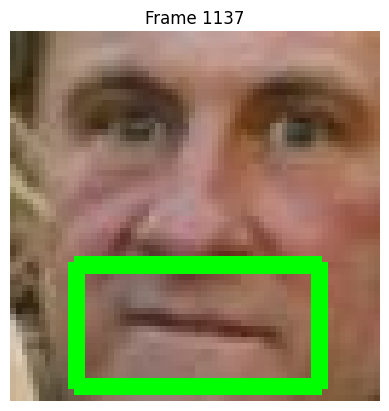

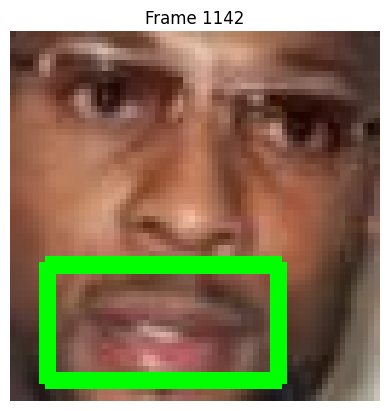

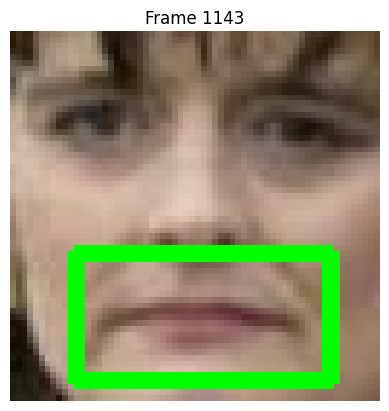

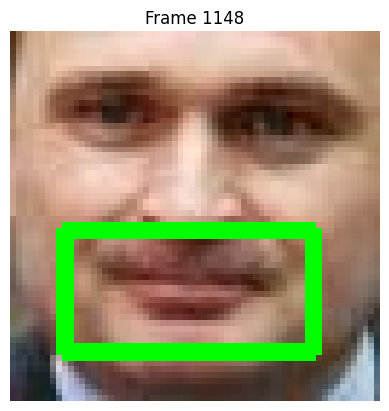

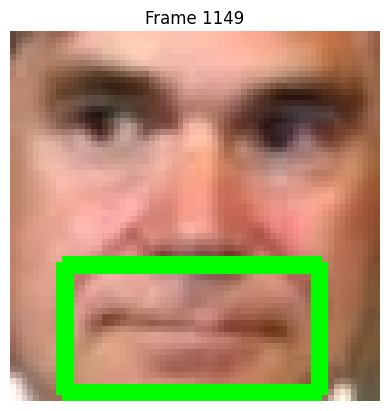

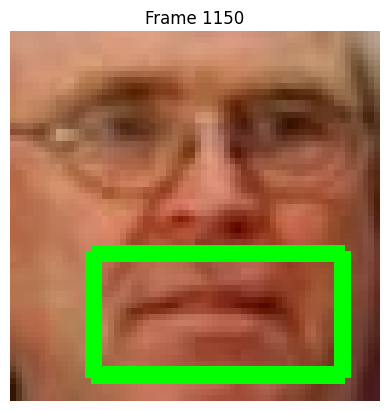

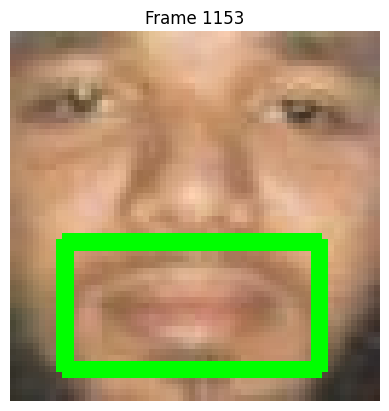

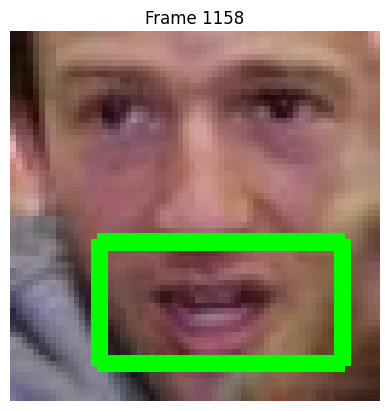

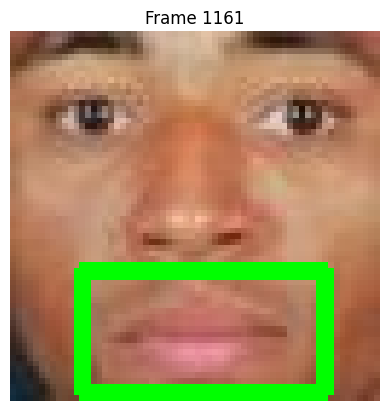

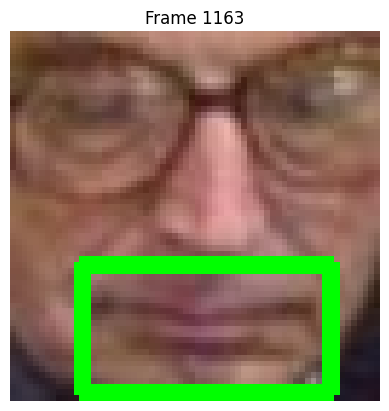

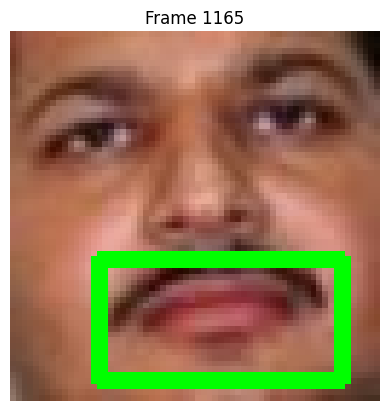

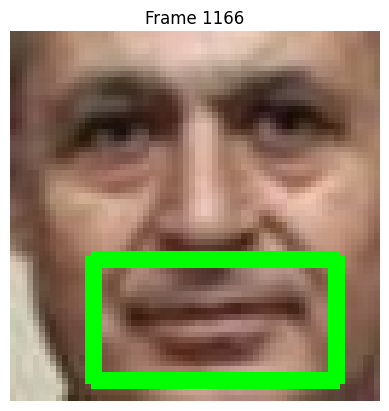

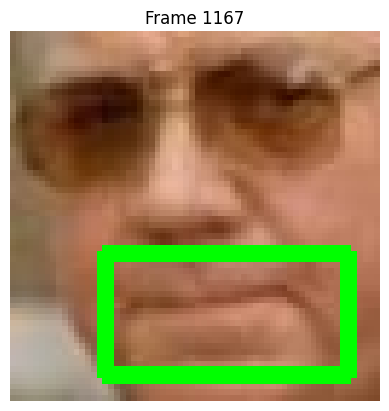

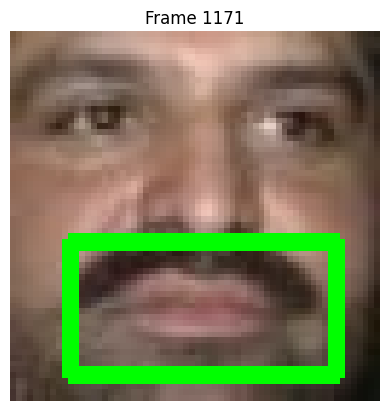

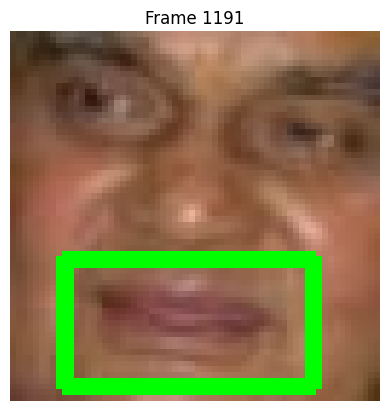

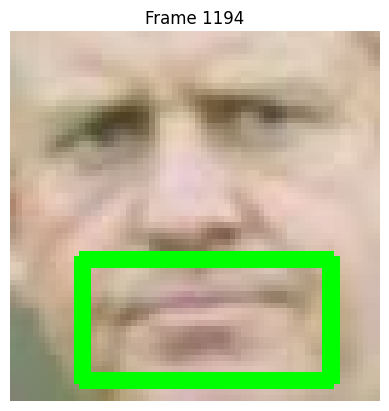

In [5]:
for i, frame in enumerate(frames):
    if predictions[i] != ground_truth[i]:
        # print(frame.participant)
        frame.draw_smile()
        frame.display()